In [1]:
from numpy import column_stack
from pandas import read_csv
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas
import numpy as np
from joblib import dump
from joblib import load
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support

# BASE DE DATOS REDUCIDA

In [2]:
print('Leyendo el archivo csv')
dataframe1 = pandas.read_csv("D:\\csv\\UNSW_NB15_training-set.csv")

Leyendo el archivo csv


NameError: name 'pandas' is not defined

In [1]:
df = dataframe1.drop(['id'], axis = 1)
df = df.drop(['attack_cat'], axis = 1)
df.head()

NameError: name 'dataframe1' is not defined

In [44]:
dataset = df.values
X = dataset[:,0:42]
X = X.astype(str)
Y = dataset[:,42]

In [62]:
Y = df.label
X = df.drop(columns=['label'])
mask = (X.dtypes == np.object)
list_cat = X.loc[:,mask].columns.tolist()
list_cat

['proto', 'service', 'state']

In [63]:
X = pandas.get_dummies(X, columns=list_cat)
X.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,...,0,0,0,1,0,0,0,0,0,0
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,...,0,0,0,1,0,0,0,0,0,0
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,...,0,0,0,1,0,0,0,0,0,0
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,...,0,0,0,1,0,0,0,0,0,0
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,...,0,0,0,1,0,0,0,0,0,0


In [64]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y,
test_size=test_size, random_state=seed)

In [65]:
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions for test data
predictions = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy: 95.81%


# BASE DE DATOS TOTAL

In [2]:
print('Leyendo las bases de datos')
dataframe1 = pandas.read_csv("D:\\csv\\UNSW-NB15_1.csv", header=None)
dataframe2 = pandas.read_csv("D:\\csv\\UNSW-NB15_2.csv", header=None)
dataframe3 = pandas.read_csv("D:\\csv\\UNSW-NB15_3.csv", header=None)
dataframe4 = pandas.read_csv("D:\\csv\\UNSW-NB15_4.csv", header=None)

Leyendo las bases de datos


D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,3,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,39,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print('Concatenar los archivos')
df = pandas.concat([dataframe1, dataframe2, dataframe3, dataframe4])

Concatenar los archivos


2540047 datos con 41 columnas
columna attack_cat, determina la categoria del ataque

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440039,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,NaN,0
440040,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,NaN,0
440041,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,NaN,0
440042,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,NaN,0


In [5]:
df.columns = ('srcip','sport','dstip','dsport','proto','state','dur','sbytes','dbytes','sttl','dttl','sloss','dloss','service','Sload','Dload','Spkts','Dpkts','swin','dwin','stcpb','dtcpb','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit','Djit','Stime','Ltime','Sintpkt','Dintpkt','tcprtt','synack','ackdat','is_sm_ips_ports','ct_state_ttl','ct_flw_http_mthd','is_ftp_login','ct_ftp_cmd','ct_srv_src','ct_srv_dst','ct_dst_lmt','ct_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src','attack_cat','Label')

In [6]:
df = df.drop(['dsport','dstip', 'Ltime', 'sport' , 'srcip', 'Stime'], axis = 1)
# dsport y sport son variables que identifican el numero de puereto de origen, por lotanto no es necesario inclurilo al modelo
# srcip y dstip, son las ip's, por lo tanto no es necesario inclurilo al modelo
# stime y ltime, son variables de tiempo, indican cuanto tiempo estuvo conectado
# se descartan porque en los archivos entregados por el autor de train y test, no se encuentran.

In [7]:
df['service'] = df['service'].replace('-','No')
df['ct_flw_http_mthd'] = df['ct_flw_http_mthd'].replace(np.nan,0)
df['is_ftp_login'] = df['is_ftp_login'].replace(np.nan, 0)

df['attack_cat'] = df['attack_cat'].replace(np.nan,'Normal')
df['attack_cat'] = df['attack_cat'].str.replace(" ","")
df['attack_cat'] = df['attack_cat'].replace('Backdoors', 'Backdoor')

In [8]:
df['ct_ftp_cmd'] = df['ct_ftp_cmd'].replace(' ',0)
df['ct_ftp_cmd'] = df['ct_ftp_cmd'].astype('int64')

In [9]:
print('Label distribution Training set:')
print(df['Label'].value_counts())
print()

Label distribution Training set:
0    2218764
1     321283
Name: Label, dtype: int64



In [10]:
print('Label distribution Training set:')
print(df['attack_cat'].value_counts())
print()

Label distribution Training set:
Normal            2218764
Generic            215481
Exploits            44525
Fuzzers             24246
DoS                 16353
Reconnaissance      13987
Analysis             2677
Backdoor             2329
Shellcode            1511
Worms                 174
Name: attack_cat, dtype: int64



In [11]:
print('Entrenamiento:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("La Variable '{col_name}' tiene {unique_cat} categorias".format(col_name=col_name, unique_cat=unique_cat))

print()
print('Distribucion de las categorias proto:')
print(df['proto'].value_counts().sort_values(ascending=False).head())

print('Distribucion de las categorias state:')
print(df['state'].value_counts().sort_values(ascending=False).head())

print('Distribucion de las categorias service:')
print(df['service'].value_counts().sort_values(ascending=False).head())

# La importancia de saber las categorias, es para conocer cuantas variables adicionales se agregaran
# al momento de transformalas en numericas

Entrenamiento:
La Variable 'proto' tiene 135 categorias
La Variable 'state' tiene 16 categorias
La Variable 'service' tiene 13 categorias
La Variable 'attack_cat' tiene 10 categorias

Distribucion de las categorias proto:
tcp     1495074
udp      990435
unas      16202
arp       10064
ospf       7798
Name: proto, dtype: int64
Distribucion de las categorias state:
FIN    1478689
CON     560588
INT     490471
REQ       9043
RST        528
Name: state, dtype: int64
Distribucion de las categorias service:
No          1246397
dns          781668
http         206273
ftp-data     125783
smtp          81645
Name: service, dtype: int64


In [12]:
Y = df.Label
X = df.drop(columns=['attack_cat','Label'])
mask = (X.dtypes == np.object)
list_cat = X.loc[:,mask].columns.tolist()
list_cat

['proto', 'state', 'service']

In [13]:
X = pandas.get_dummies(X, columns=list_cat)
X.head()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
0,0.001055,132,164,31,29,0,0,500473.93750,621800.93750,2,...,0,0,0,0,0,0,0,0,0,0
1,0.036133,528,304,31,29,0,0,87676.08594,50480.17188,4,...,0,0,0,0,0,0,0,0,0,0
2,0.001119,146,178,31,29,0,0,521894.53130,636282.37500,2,...,0,0,0,0,0,0,0,0,0,0
3,0.001209,132,164,31,29,0,0,436724.56250,542597.18750,2,...,0,0,0,0,0,0,0,0,0,0
4,0.001169,146,178,31,29,0,0,499572.25000,609067.56250,2,...,0,0,0,0,0,0,0,0,0,0


In [10]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y,
test_size=test_size, random_state=seed)

In [11]:
model = XGBClassifier()
model.fit(X_train, y_train, verbose = True)
print(model)
# make predictions for test data
predictions = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy: 99.39%


In [36]:
print(confusion_matrix(y_test, predictions))
print(roc_auc_score(y_test, predictions))

[[730130   2167]
 [  2946 102973]]
0.9846135557187964


In [104]:
dump(model, "xgunswnb.joblib.dat")
print("Saved model to: pima.joblib.dat")

Saved model to: pima.joblib.dat


In [15]:
from matplotlib import pyplot as plt

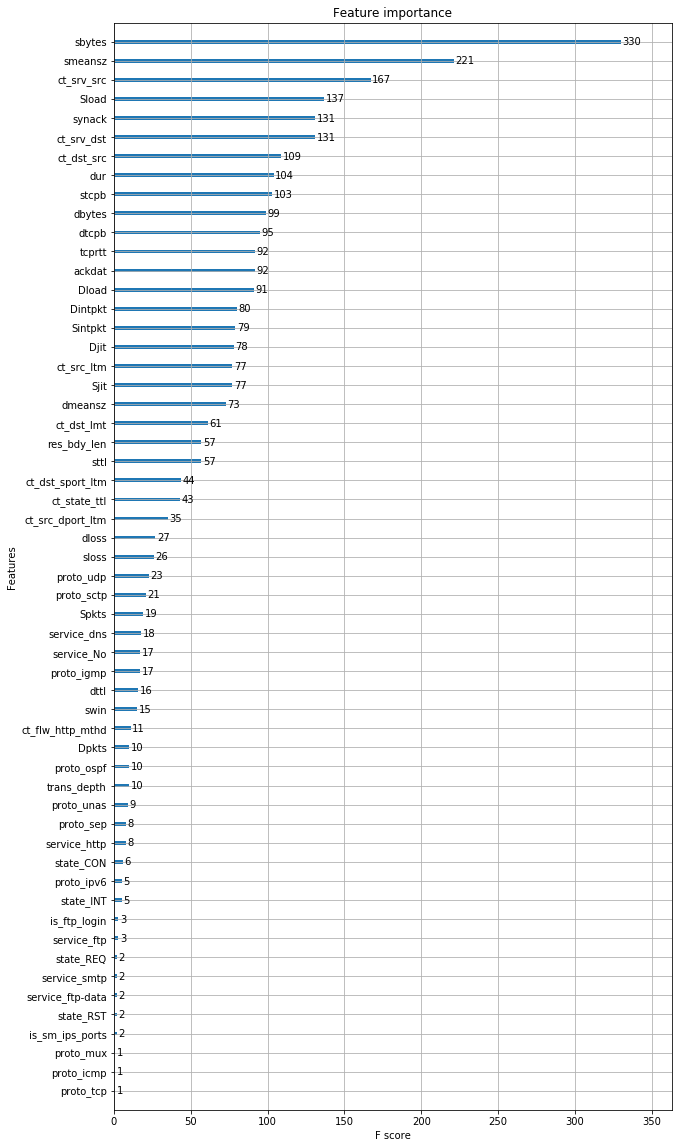

In [46]:
fig, ax = plt.subplots(figsize=(10, 20))
plot_importance(model, ax=ax)

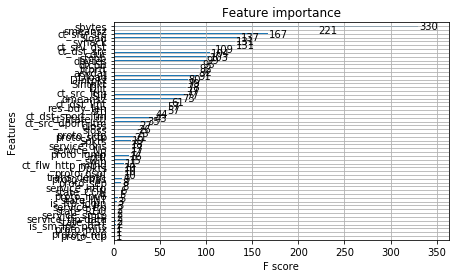

In [106]:
plot_importance(model)
pyplot.show()

In [24]:
Xnn = X[['sbytes','smeansz','ct_srv_src','Sload','synack','ct_srv_dst','ct_dst_src','dur','stcpb','dbytes','dtcpb','tcprtt','ackdat','Dload','Dintpkt','Sintpkt','Djit','ct_src_ltm','Sjit']]
Xnn.shape

(2540047, 19)

In [25]:
seed = 7
test_size = 0.33
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xnn, Y,
test_size=test_size, random_state=seed)

In [26]:
modeln = XGBClassifier()
modeln.fit(Xn_train, yn_train, verbose = True)
print(modeln)
# make predictions for test data
predictionsn = modeln.predict(Xn_test)
# evaluate predictions
accuracy = accuracy_score(yn_test, predictionsn)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy: 99.34%


In [37]:
print(confusion_matrix(yn_test, predictionsn))
print(roc_auc_score(yn_test, predictionsn))

[[729666   2631]
 [  2869 103050]]
0.9846602296752038


In [39]:
recall_score(yn_test, predictionsn)

0.9729132639092136

In [14]:
Xsbytes = X[['sbytes']]

In [15]:
seed = 7
test_size = 0.33
Xsbytes_train, Xsbytes_test, ynn_train, ynn_test = train_test_split(Xsbytes, Y,
test_size=test_size, random_state=seed)

In [18]:
modelnn = XGBClassifier()
modelnn.fit(Xsbytes_train, ynn_train, verbose = True)
print(modelnn)
# make predictions for test data
predictionsnn = modelnn.predict(Xsbytes_test)
# evaluate predictions
accuracy = accuracy_score(ynn_test, predictionsnn)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy: 98.39%


# SVM